### Problem 01 - Crime Clusering
Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

#### 1. Importing the Necessary libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.cluster import DBSCAN
from sklearn import metrics

#### 2. Importing data 

In [5]:
crime_data = pd.read_csv("crime_data.csv")
crime_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


#### 3. Data understanding

In [6]:
crime_data.dtypes

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

In [7]:
crime_data.shape

(50, 5)

In [8]:
crime_data.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [9]:
crime_data.describe(include='all')

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
count,50,50.00000,50.000000,50.000000,50.000000
unique,50,NaN,NaN,NaN,NaN
top,Alabama,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,7.78800,170.760000,65.540000,21.232000
std,NaN,4.35551,83.337661,14.474763,9.366385
min,NaN,0.80000,45.000000,32.000000,7.300000
25%,NaN,4.07500,109.000000,54.500000,15.075000
50%,NaN,7.25000,159.000000,66.000000,20.100000
75%,NaN,11.25000,249.000000,77.750000,26.175000


#### 4. Data Processing

In [10]:
mm_scaler= preprocessing.MinMaxScaler()

In [11]:
crime_data.iloc[:,1:5]

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [12]:
crime_data_11 = crime_data.iloc[:,1:5]
crime_data_1 = mm_scaler.fit_transform(crime_data_11)
crime_data_1 = pd.DataFrame(crime_data_1, columns = crime_data_11.columns)
crime_data_1.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [13]:
crime_data.columns = ['city', 'Murder', 'Assault', 'UrbanPop', 'Rape']
crime_data.head()

,city,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [14]:
crime_data_2 = crime_data['city']

In [15]:
crime_data_2 = pd.concat([crime_data_1, crime_data_2], axis=1)
crime_data_2.head()

,Murder,Assault,UrbanPop,Rape,city
0,0.746988,0.654110,0.440678,0.359173,Alabama
1,0.554217,0.746575,0.271186,0.961240,Alaska
2,0.439759,0.852740,0.813559,0.612403,Arizona
3,0.481928,0.496575,0.305085,0.315245,Arkansas
4,0.493976,0.791096,1.000000,0.860465,California


#### 5. Model Building

##### A. Hierarchical Clustering

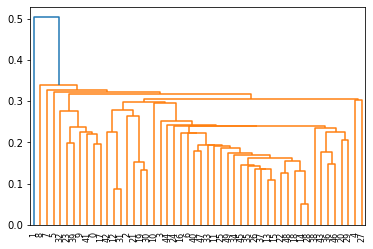

In [16]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(crime_data_1, method='single'))

In [17]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'single')
hc

AgglomerativeClustering(linkage='single', n_clusters=4)

In [18]:
# save clusters for chart
y_hc = hc.fit_predict(crime_data_1)
y_hc

array([0, 3, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [19]:
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters.head()

,Clusters
0,0
1,3
2,0
3,0
4,0


In [20]:
crime_data_2['clusters'] = Clusters
crime_data_HC = crime_data_2
crime_data_HC.head()

,Murder,Assault,UrbanPop,Rape,city,clusters
0,0.746988,0.654110,0.440678,0.359173,Alabama,0
1,0.554217,0.746575,0.271186,0.961240,Alaska,3
2,0.439759,0.852740,0.813559,0.612403,Arizona,0
3,0.481928,0.496575,0.305085,0.315245,Arkansas,0
4,0.493976,0.791096,1.000000,0.860465,California,0


In [21]:
crime_data_HC[crime_data_HC['clusters']==0].head()

,Murder,Assault,UrbanPop,Rape,city,clusters
0,0.746988,0.654110,0.440678,0.359173,Alabama,0
2,0.439759,0.852740,0.813559,0.612403,Arizona,0
3,0.481928,0.496575,0.305085,0.315245,Arkansas,0
4,0.493976,0.791096,1.000000,0.860465,California,0
5,0.427711,0.544521,0.779661,0.811370,Colorado,0


In [22]:
crime_data_HC[crime_data_HC['clusters']==1]

,Murder,Assault,UrbanPop,Rape,city,clusters
7,0.307229,0.660959,0.677966,0.219638,Delaware,1


In [23]:
crime_data_HC[crime_data_HC['clusters']==2]

,Murder,Assault,UrbanPop,Rape,city,clusters
8,0.879518,0.993151,0.813559,0.635659,Florida,2


In [24]:
crime_data_HC[crime_data_HC['clusters']==3]

,Murder,Assault,UrbanPop,Rape,city,clusters
1,0.554217,0.746575,0.271186,0.96124,Alaska,3


##### B. Kmean Clustering

###### a. Elbow curve method

In [25]:
wcss = []
for i in range(2,11):
    KM = KMeans(n_clusters=i,random_state=12)
    KM.fit(crime_data_1)
    wcss.append(KM.inertia_)

In [26]:
wcss

[6.596893867946197,
 5.010878493006418,
 3.683456153585914,
 3.1842618139677215,
 2.8706843119018357,
 2.539649153417607,
 2.371517407007889,
 2.1073331222994978,
 1.88577776620818]

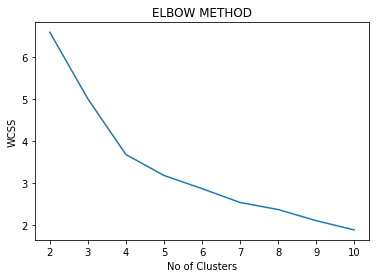

In [27]:
plt.plot(range(2,11),wcss)
plt.title('ELBOW METHOD')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()

###### b. Silhouette score

In [28]:
Silhouette_score = []
for i in range(2,11):
    KM = KMeans(n_clusters=i,random_state=12)
    KM.fit_predict(crime_data_1)
    score = silhouette_score(crime_data_1,labels=KM.labels_, metric='euclidean')
    Silhouette_score.append(score)

In [29]:
Silhouette_score

[0.42364457559625074,
 0.3187755079997931,
 0.34089035600743633,
 0.30418072516326367,
 0.29004477391070826,
 0.284331123143497,
 0.26940178387381786,
 0.23998374603955458,
 0.2510528926517516]

###### c. Calinski harabasz score

In [30]:
ch_score = []
for i in range(2,11):
    KM = KMeans(n_clusters=i,random_state=12)
    KM.fit_predict(crime_data_1)
    score = calinski_harabasz_score(crime_data_1,labels=KM.labels_)
    ch_score.append(score)

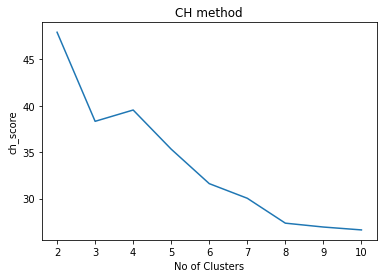

In [31]:
plt.plot(range(2,11),ch_score)
plt.title('CH method')
plt.xlabel('No of Clusters')
plt.ylabel('ch_score')
plt.show()

In [32]:
# spike is observed at clusters = 4

In [34]:
KM = KMeans(n_clusters=3,random_state=12)
label = KM.fit_predict(crime_data_1)
label

array([1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2,
       0, 2, 2, 0, 0, 2])

In [35]:
Clusters=pd.DataFrame(KM.fit_predict(crime_data_1),columns=['Clusters'])
Clusters.head()

,Clusters
0,1
1,1
2,1
3,2
4,1


In [36]:
crime_data_2['clusters'] = Clusters
crime_data_KM = crime_data_2
crime_data_KM.head()

,Murder,Assault,UrbanPop,Rape,city,clusters
0,0.746988,0.654110,0.440678,0.359173,Alabama,1
1,0.554217,0.746575,0.271186,0.961240,Alaska,1
2,0.439759,0.852740,0.813559,0.612403,Arizona,1
3,0.481928,0.496575,0.305085,0.315245,Arkansas,2
4,0.493976,0.791096,1.000000,0.860465,California,1


In [37]:
crime_data_KM[crime_data_KM['clusters']==0].head()

,Murder,Assault,UrbanPop,Rape,city,clusters
11,0.108434,0.256849,0.372881,0.178295,Idaho,0
14,0.084337,0.037671,0.423729,0.103359,Iowa,0
16,0.536145,0.219178,0.338983,0.232558,Kentucky,0
18,0.078313,0.130137,0.322034,0.012920,Maine,0
22,0.114458,0.092466,0.576271,0.196382,Minnesota,0


In [38]:
crime_data_KM[crime_data_KM['clusters']==1].head()

,Murder,Assault,UrbanPop,Rape,city,clusters
0,0.746988,0.654110,0.440678,0.359173,Alabama,1
1,0.554217,0.746575,0.271186,0.961240,Alaska,1
2,0.439759,0.852740,0.813559,0.612403,Arizona,1
4,0.493976,0.791096,1.000000,0.860465,California,1
5,0.427711,0.544521,0.779661,0.811370,Colorado,1


In [39]:
crime_data_KM[crime_data_KM['clusters']==2].head()

,Murder,Assault,UrbanPop,Rape,city,clusters
3,0.481928,0.496575,0.305085,0.315245,Arkansas,2
6,0.150602,0.222603,0.762712,0.098191,Connecticut,2
7,0.307229,0.660959,0.677966,0.219638,Delaware,2
10,0.271084,0.003425,0.864407,0.333333,Hawaii,2
13,0.385542,0.232877,0.559322,0.354005,Indiana,2


In [40]:
crime_data_KM[crime_data_KM['clusters']==3].head()

,Murder,Assault,UrbanPop,Rape,city,clusters


In [41]:
crime_data_1.shape

(50, 4)

In [42]:
filtered_label0 = crime_data_1[label == 0]
filtered_label1 = crime_data_1[label == 1]
filtered_label2 = crime_data_1[label == 2]
filtered_label3 = crime_data_1[label == 3]
filtered_label0.shape

(13, 4)

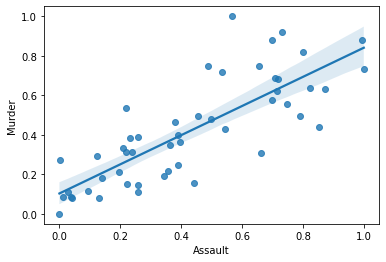

In [43]:
sns.regplot(x=crime_data_1['Assault'] , y=crime_data_1['Murder'])
plt.show()

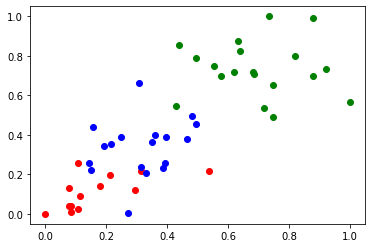

In [44]:
    plt.scatter(filtered_label0['Murder'] , filtered_label0['Assault'], color = 'red')
    plt.scatter(filtered_label1['Murder'] , filtered_label1['Assault'], color = 'green')
    plt.scatter(filtered_label2['Murder'] , filtered_label2['Assault'], color = 'blue')
    plt.scatter(filtered_label3['Murder'] , filtered_label3['Assault'], color = 'pink')
    plt.show()

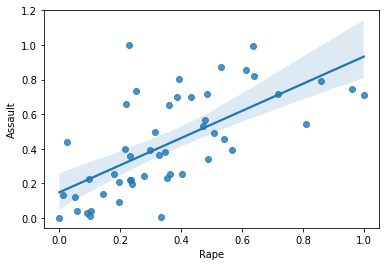

In [45]:
sns.regplot(x=crime_data_1['Rape'] , y=crime_data_1['Assault'])
plt.show()

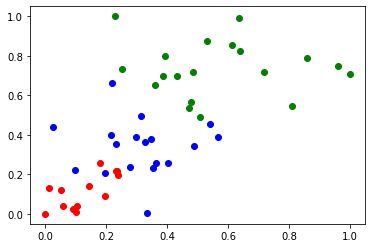

In [46]:
plt.scatter(filtered_label0['Rape'] , filtered_label0['Assault'], color = 'red')
plt.scatter(filtered_label1['Rape'] , filtered_label1['Assault'], color = 'green')
plt.scatter(filtered_label2['Rape'] , filtered_label2['Assault'], color = 'blue')
plt.scatter(filtered_label3['Rape'] , filtered_label3['Assault'], color = 'pink')
plt.show()

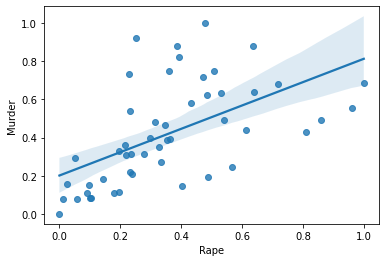

In [47]:
sns.regplot(x=crime_data_1['Rape'] , y=crime_data_1['Murder'])
plt.show()

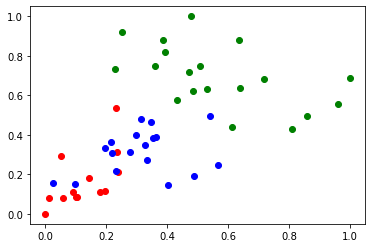

In [49]:
plt.scatter(filtered_label0['Rape'] , filtered_label0['Murder'], color = 'red')
plt.scatter(filtered_label1['Rape'] , filtered_label1['Murder'], color = 'green')
plt.scatter(filtered_label2['Rape'] , filtered_label2['Murder'], color = 'blue')
plt.scatter(filtered_label3['Rape'] , filtered_label3['Murder'], color = 'pink')
plt.show()

##### c. DBSCAN

In [50]:
# we know that no cluster equal to 4 for this data set
#lets check for DBSCAN

In [51]:
db = DBSCAN(eps=0.25, min_samples=3).fit(crime_data_1)

In [52]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
labels

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1,  0, -1,  1,  2,  1,  1,  1,  1,
        0,  1,  3,  1,  3,  1,  0,  1,  1,  1, -1,  1,  1,  3,  2, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  2,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [53]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(crime_data_1, labels))

Estimated number of clusters: 4
Estimated number of noise points: 10
Silhouette Coefficient: 0.206


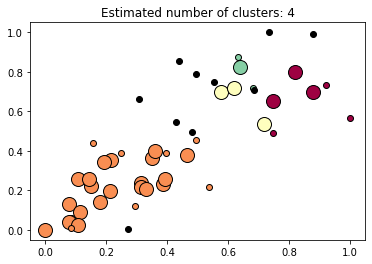

In [54]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = crime_data_1[class_member_mask & core_samples_mask]
    plt.plot(
        xy['Murder'],
        xy['Assault'],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = crime_data_1[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy['Murder'],
        xy['Assault'],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

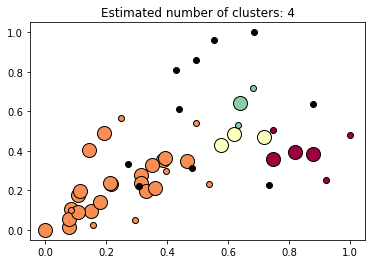

In [55]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = crime_data_1[class_member_mask & core_samples_mask]
    plt.plot(
        xy['Murder'],
        xy['Rape'],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = crime_data_1[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy['Murder'],
        xy['Rape'],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

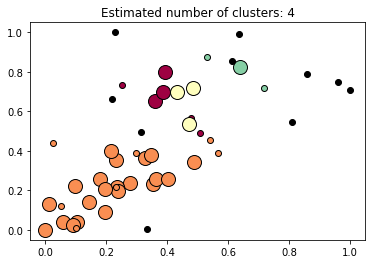

In [56]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = crime_data_1[class_member_mask & core_samples_mask]
    plt.plot(
        xy['Rape'],
        xy['Assault'],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = crime_data_1[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy['Rape'],
        xy['Assault'],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()